In [1]:
# Three Observations:
# 1. The Ketapril treatment regimen was the least succesful when compared to the other drugs based on the mean and median tumor volume 
# observed
# 2. The two best treatments include the Capomulin and Ramicaine drugs based on the mean and median tumor volume, these drugs also had the 
# greatest number of observed mouse timepoints which could contribute to the lower mean and median values. 
# 3. When compared the mouse weight and the average tumor volume, specifically for mice treated with the Capomulin drug, 
# the larger the weight of the mouse, the larger the tumor volume. This is shown not only by looking at the linear regression line but 
# also the correlation coefficent is 0.84, which indicates a positive correlation. 

In [2]:
#Set up dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

#Data file paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#read datafiles
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Merged datafiles
merged_mouse_data = pd.merge(study_results, mouse_metadata, on= ["Mouse ID"], how="left")
merged_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
#Calculating the number of mice
number_of_mice = merged_mouse_data["Mouse ID"].nunique()
number_of_mice

249

In [4]:
#Determined mouse id that had duplicates in the dataset
dup = merged_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicates = merged_mouse_data.loc[dup, "Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
#listed all the rows with the g989 mouse ID
g989_mouseid = merged_mouse_data.loc[merged_mouse_data['Mouse ID']=="g989"]
g989_mouseid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Removed all rows that contained g989 mouse ID
idx = merged_mouse_data[merged_mouse_data['Mouse ID'].isin(duplicates)].index
clean_merged_mouse_data = merged_mouse_data.drop(idx)
clean_merged_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
#Calculated the number of mice after g989 was removed
clean_number_of_mice = clean_merged_mouse_data["Mouse ID"].nunique()
clean_number_of_mice


248

In [8]:
#Created a dataframe that was grouped by Drug Regimen 
grouped_df = clean_merged_mouse_data.set_index(["Drug Regimen"])
drug_regimen_df = grouped_df.groupby("Drug Regimen")

#Performed statistics on Tumor Volume for each drug regimen
mean_tumor_volume = drug_regimen_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen_df["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_regimen_df["Tumor Volume (mm3)"].var()
stdev_tumor_volume = drug_regimen_df["Tumor Volume (mm3)"].std()
standard_error = drug_regimen_df["Tumor Volume (mm3)"].sem()

#Created a dataframe showing these statistics
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, \
                                      "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Standard Deviation": stdev_tumor_volume, \
                                       "Tumor Volume Standard Error": standard_error})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Created a dataframe showing statistics using the aggregate method
drug_regimen_summary2 = drug_regimen_df.aggregate({"Tumor Volume (mm3)" : [ 'mean', 'median', 'var', 'std', \
                                                   'sem']})
drug_regimen_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

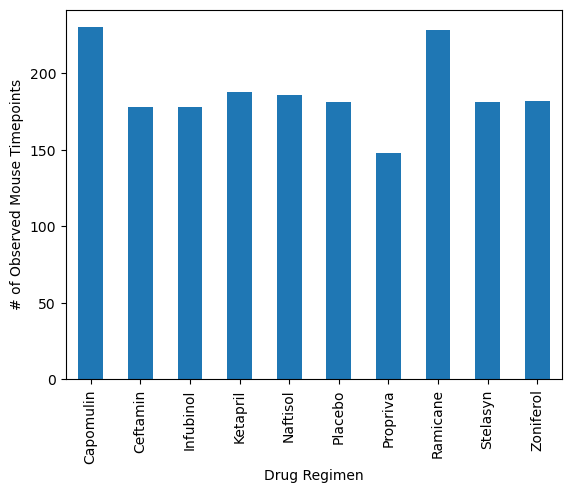

In [10]:
#Created a bar plot showing the number of rows (using Timepoints) for each drug regimen using pandas
time = drug_regimen_df["Timepoint"].count()
time.plot(kind ="bar", ylabel="# of Observed Mouse Timepoints")
plt.show()

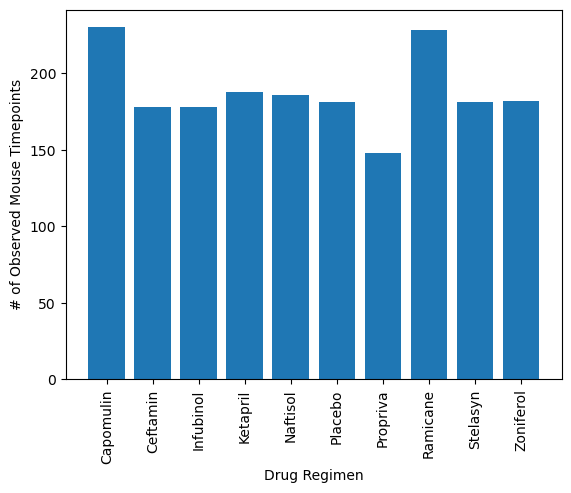

In [11]:
#Created a bar plot showing the number of rows (using Timepoints) for each drug regimen using pyplot
time = drug_regimen_df["Timepoint"].count()
plt.bar(time.index, time.values)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.savefig("figures/bar_timepoints_drug_regimen")
plt.show()

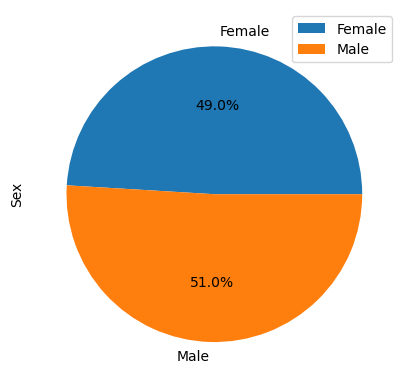

In [12]:
#created a pie plot showing distribution of sexes in mice using pandas
grouped_sex = clean_merged_mouse_data.groupby("Sex")
sexes = grouped_sex.count()
sexes.plot(kind="pie",y='Mouse ID', ylabel="Sex", autopct='%1.1f%%')
plt.show()

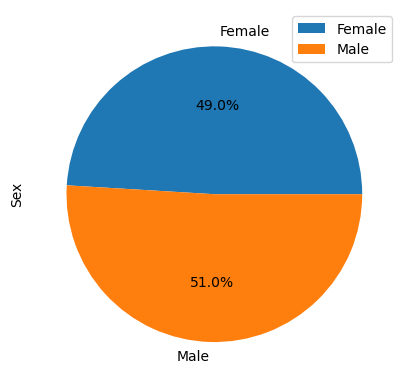

In [13]:
#created a pie plot showing distribution of sexes in mice using pyplot
num_sexes = grouped_sex["Mouse ID"].count()
plt.pie(num_sexes.values, labels = num_sexes.index, autopct='%1.1f%%')
plt.legend(num_sexes.index)
plt.ylabel("Sex")
plt.savefig("figures/sex_distribution_pie")
plt.show()


In [14]:
#Grouped dataframe by Mouse ID
group_mouse = clean_merged_mouse_data.groupby("Mouse ID")

#For each mouse ID determined the max Timepoint
greatest_timepoint = group_mouse["Timepoint"].max()

#Merged dataframes grab all columns from original dataframe along with Mouse ID and Final Timepoint from new dataframe
merge_df=pd.merge(clean_merged_mouse_data, greatest_timepoint, on=["Mouse ID", 'Timepoint'], how = "right")


In [15]:
#Created a list of treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Created an empty list of tumor volumes
tumor_volume = []

#Created a for loop to determine an potential outliers in Tumor Volume for each treatment 
for treatment in treatments:
    subset = merge_df.loc[merge_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    tumor_volume.append(subset)
    quartiles = subset.quantile([.25,.5,.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)
    outliers = subset[(subset>upper_bound) | (subset<lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


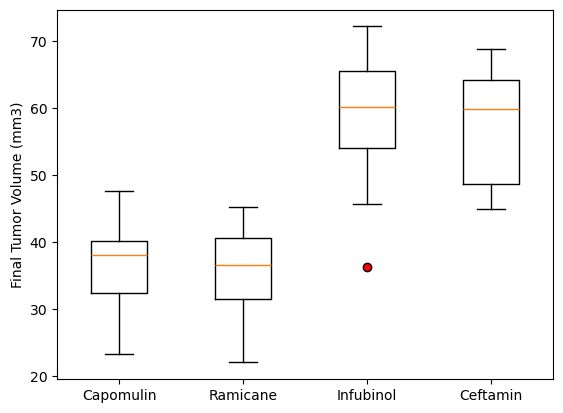

In [16]:
#Created a box plot to show distribution of tumor volume for each treatment
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume, labels=treatments,flierprops=dict(markerfacecolor='red'))
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.savefig('figures/boxplot_tumor_volume')
plt.show()

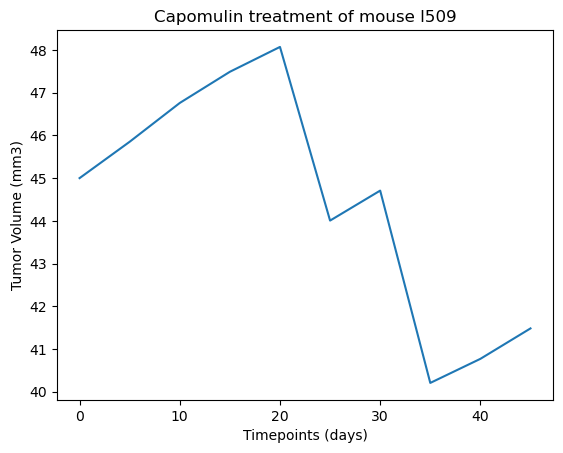

In [17]:
#Generated a line plot to show Tumor Volume vs Timepoint utilizing the Capomulin treatment for Mouse ID l509
l509mouse = clean_merged_mouse_data.loc[clean_merged_mouse_data["Mouse ID"]=="l509"]
lineplot= plt.plot(l509mouse["Timepoint"], l509mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoints (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.savefig('figures/lineplot_tumorvolume_timepoint_Capomulin')

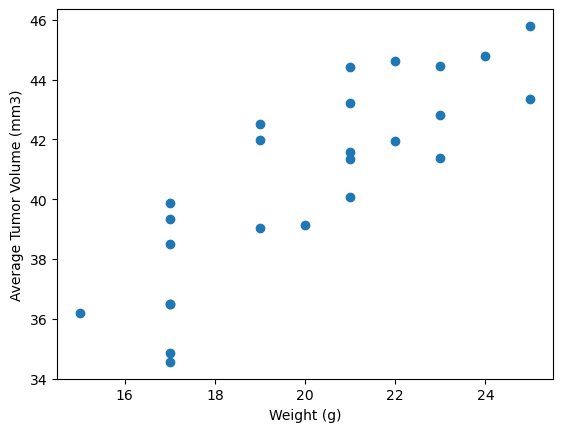

In [18]:
#Created a scatter plot for mouse weight vs the average tumor volume for all mice that utilized the Capomulin treatment
capomulin_regimen = clean_merged_mouse_data.loc[clean_merged_mouse_data["Drug Regimen"]=="Capomulin"]
capomulin_regimen_grouped = capomulin_regimen.groupby("Mouse ID")
avg_tumor_vol_cap = capomulin_regimen_grouped["Tumor Volume (mm3)"].mean()
avg_weight_cap = capomulin_regimen_grouped["Weight (g)"].mean()
plt.scatter(avg_weight_cap, avg_tumor_vol_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


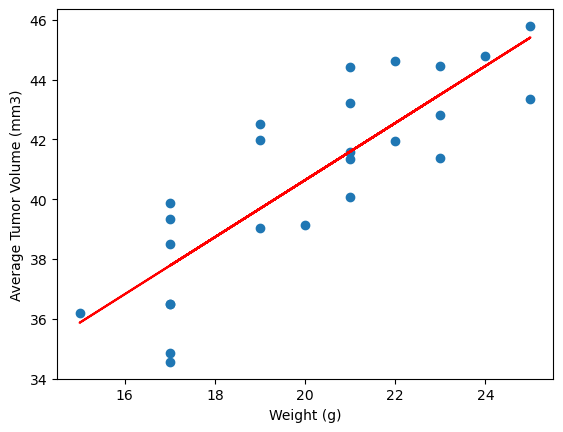

In [19]:
#Calcuated the correlation coefficient and a linear regression model for the scatter plot above
plt.scatter(avg_weight_cap, avg_tumor_vol_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight_cap, avg_tumor_vol_cap)
correlation = st.pearsonr(avg_weight_cap,avg_tumor_vol_cap)
regress_values = avg_weight_cap * slope + intercept
plt.plot(avg_weight_cap,regress_values,"r-")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.savefig("figures/scatter_mouseweight_tumorvolume")
plt.show()